![](https://hindi.cdn.zeenews.com/hindi/sites/default/files/2022/07/31/1246237-titanic01.jpg?im=FitAndFill=(1200,900))

# Business Problem

- Predicting survival status in the Titanic ship disaster. This is a classification problem, as our target variable (whether they survived or not) belongs to one of two classes: survived or did not survive.

# Data Set Story

- The data set contains information about passengers on the Titanic ship disaster in 1912. This information includes features such as the passengers' gender, age, class (1st, 2nd, or 3rd class), ticket prices, and the ports they embarked from. Additionally, information is provided on whether each passenger survived the disaster or not. This data set is used to train and test machine learning models. The aim of the model is to predict whether a passenger will survive or not based on the given features.

**Variables in the Data Set:**

1. **PassengerId:** Unique identifier for each passenger.

2. **Survived:** Survival status (0 = No; 1 = Yes).

3. **Pclass:** Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd).

4. **Name:** Name of the passenger.

5. **Sex:** Sex of the passenger (male or female).

6. **Age:** Age of the passenger.

7. **SibSp:** Number of siblings/spouses aboard.

8. **Parch:** Number of parents/children aboard.

9. **Ticket:** Ticket number.

10. **Fare:** Passenger fare.

11. **Cabin:** Cabin number.

12. **Embarked:** Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

# 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action="ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Adjusting Row Column Settings

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 3. Loading the data Set

In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [5]:
test_data.shape

(418, 11)

In [6]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [8]:
train_data.shape

(891, 12)

In [9]:
gen_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [10]:
gen_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [11]:
sub_id=test_data["PassengerId"]

In [12]:
sub_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [13]:
first_train = train_data.shape[0]

In [14]:
first_train

891

In [15]:
df = pd.concat([train_data, test_data]).reset_index()

In [16]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.000,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,1,2,1.000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,2,3,1.000,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,3,4,1.000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,4,5,0.000,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


# 4. Exploratory Data Analysis

In [17]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [18]:
check_df(df)

##################### Shape #####################
(1309, 13)
##################### Types #####################
index            int64
PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   index  PassengerId  Survived  Pclass  \
0      0            1     0.000       3   
1      1            2     1.000       1   
2      2            3     1.000       3   
3      3            4     1.000       1   
4      4            5     0.000       3   

                                                Name     Sex    Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1   
2                             Heik

In [19]:
#drop_list = ["Name","Ticket","Cabin", 'SibSp', 'Parch', 'PassengerId', 'index']

In [20]:
drop_list = ["Name","Ticket","Cabin", 'PassengerId', 'index']

In [21]:
df.drop(drop_list, axis =1, inplace=True)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000,3,male,22.000,1,0,7.250,S
1,1.000,1,female,38.000,1,0,71.283,C
2,1.000,3,female,26.000,0,0,7.925,S
3,1.000,1,female,35.000,1,0,53.100,S
4,0.000,3,male,35.000,0,0,8.050,S


# 5. Capturing / Detecting Numeric and Categorical Variables

In [23]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [24]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 1309
Variables: 8
cat_cols: 6
num_cols: 2
cat_but_car: 0
num_but_cat: 4


In [25]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [26]:
cat_cols.remove("Survived")

In [27]:
cat_cols

['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

In [28]:
num_cols

['Age', 'Fare']

In [29]:
cat_but_car

[]

In [30]:
 num_but_cat

['Survived', 'Pclass', 'SibSp', 'Parch']

# 6. Analysis of Categorical Variables

In [31]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        Sex  Ratio
male    843 64.400
female  466 35.600
##########################################


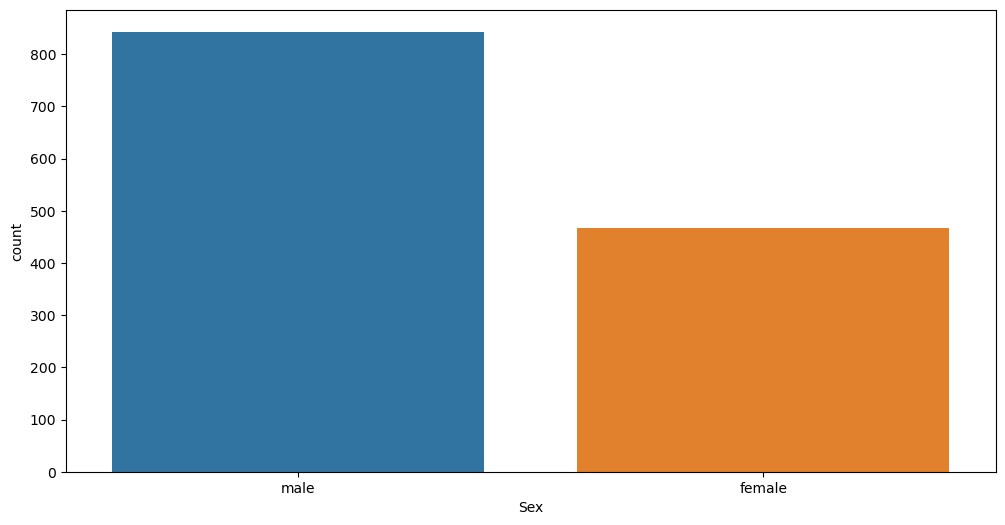

   Embarked  Ratio
S       914 69.824
C       270 20.626
Q       123  9.396
##########################################


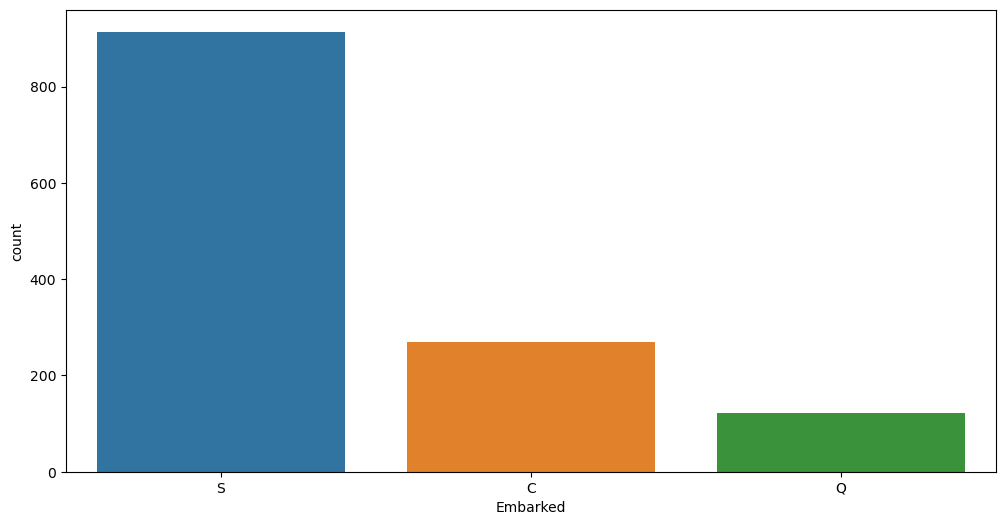

   Pclass  Ratio
3     709 54.163
1     323 24.675
2     277 21.161
##########################################


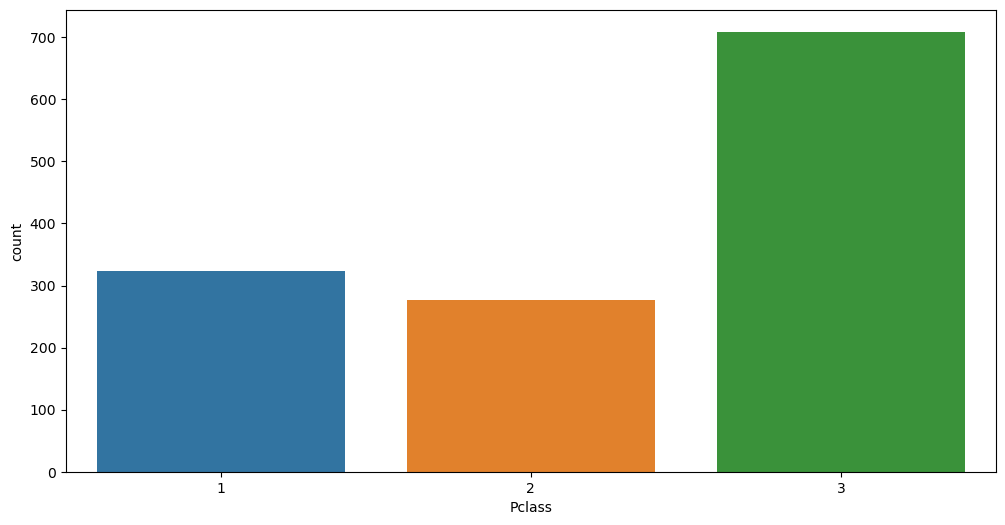

   SibSp  Ratio
0    891 68.067
1    319 24.370
2     42  3.209
4     22  1.681
3     20  1.528
8      9  0.688
5      6  0.458
##########################################


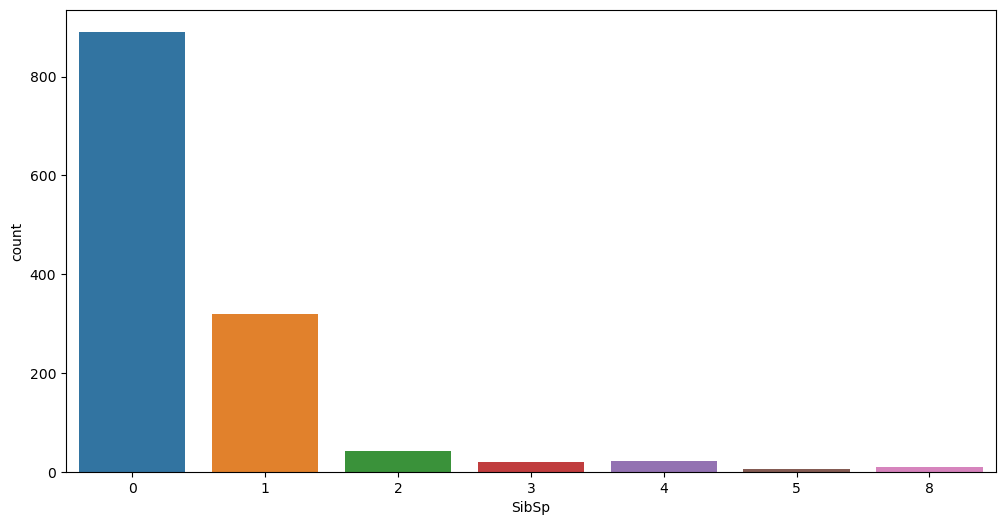

   Parch  Ratio
0   1002 76.547
1    170 12.987
2    113  8.633
3      8  0.611
5      6  0.458
4      6  0.458
6      2  0.153
9      2  0.153
##########################################


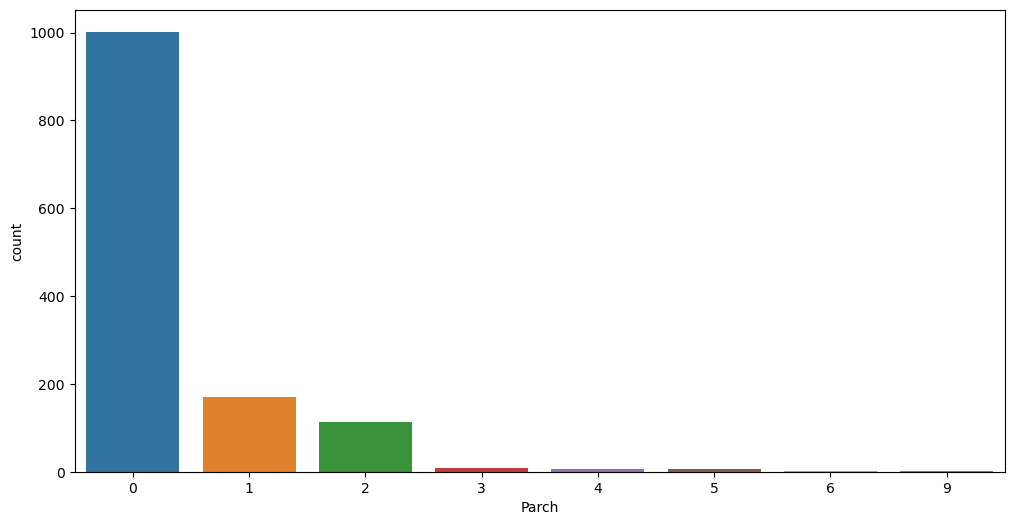

In [32]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# 7. Analysis of Numerical Variables

In [33]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   1046.000
mean      29.881
std       14.413
min        0.170
5%         5.000
10%       14.000
20%       19.000
30%       22.000
40%       25.000
50%       28.000
60%       31.000
70%       36.000
80%       42.000
90%       50.000
95%       57.000
99%       65.000
max       80.000
Name: Age, dtype: float64


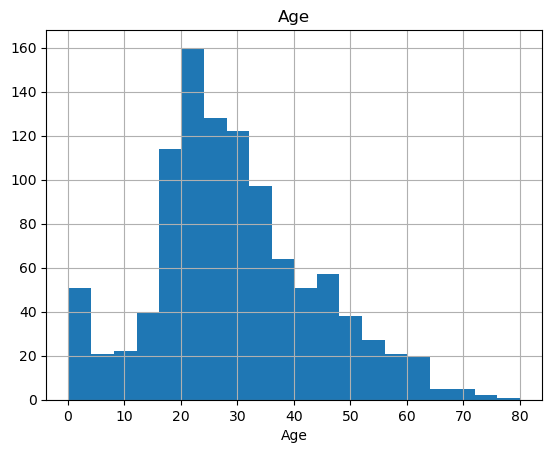

count   1308.000
mean      33.295
std       51.759
min        0.000
5%         7.225
10%        7.568
20%        7.854
30%        8.050
40%       10.500
50%       14.454
60%       21.679
70%       26.955
80%       41.579
90%       78.051
95%      133.650
99%      262.375
max      512.329
Name: Fare, dtype: float64


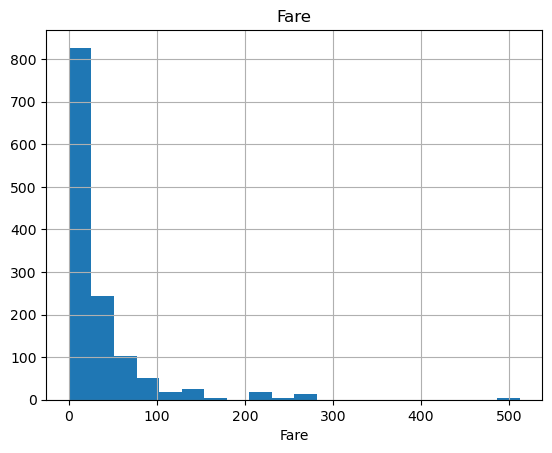

In [34]:
for col in num_cols:
    num_summary(df, col, plot=True)

# 8. Analysis of Categorical Variables by Target

In [35]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

        TARGET_MEAN
Sex                
female        0.742
male          0.189




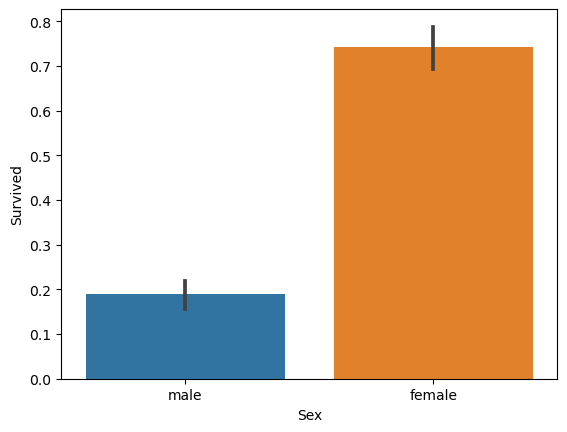

          TARGET_MEAN
Embarked             
C               0.554
Q               0.390
S               0.337




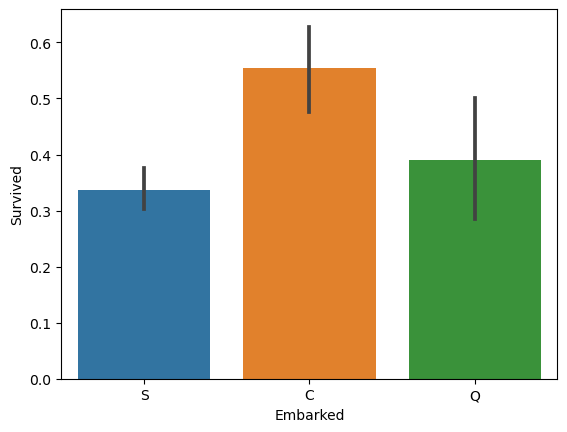

        TARGET_MEAN
Pclass             
1             0.630
2             0.473
3             0.242




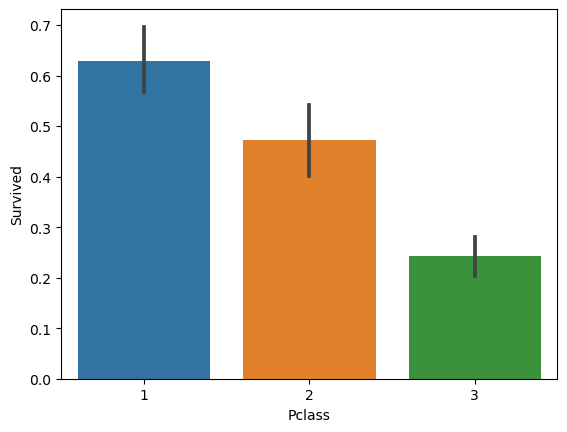

       TARGET_MEAN
SibSp             
0            0.345
1            0.536
2            0.464
3            0.250
4            0.167
5            0.000
8            0.000




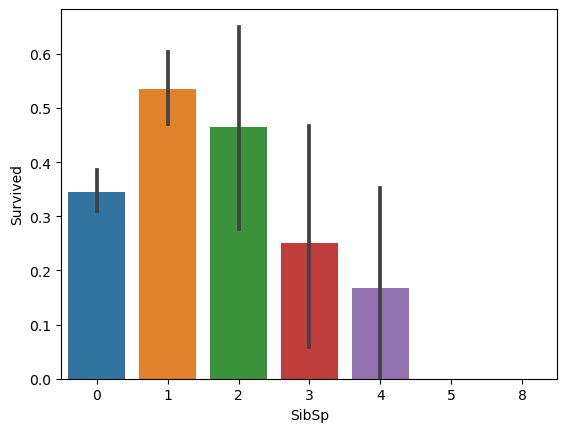

       TARGET_MEAN
Parch             
0            0.344
1            0.551
2            0.500
3            0.600
4            0.000
5            0.200
6            0.000
9              NaN




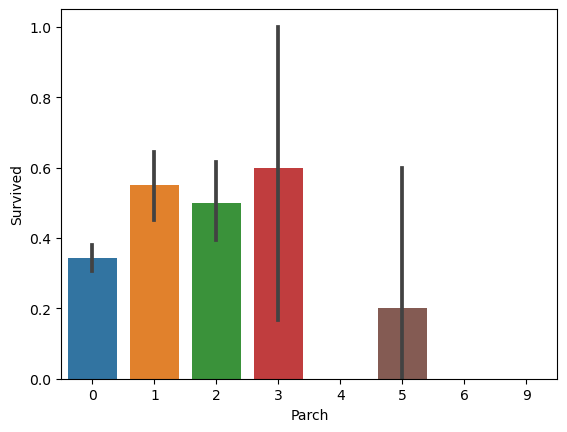

In [36]:
for col in cat_cols:
    target_summary_with_cat(df, 'Survived', col, plot=True)

# 9. Analysis of Numeric Variables by Target

In [37]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [38]:
for col in num_cols:
    target_summary_with_cat(df, 'Survived', col, plot=False)

        TARGET_MEAN
Age                
0.170           NaN
0.330           NaN
0.420         1.000
0.670         1.000
0.750         1.000
...             ...
70.500        0.000
71.000        0.000
74.000        0.000
76.000          NaN
80.000        1.000

[98 rows x 1 columns]


         TARGET_MEAN
Fare                
0.000          0.067
3.171            NaN
4.013          0.000
5.000          0.000
6.237          0.000
...              ...
227.525        0.750
247.521        0.500
262.375        1.000
263.000        0.500
512.329        1.000

[281 rows x 1 columns]




# 10. Examining the Logarithm of the Dependent Variable

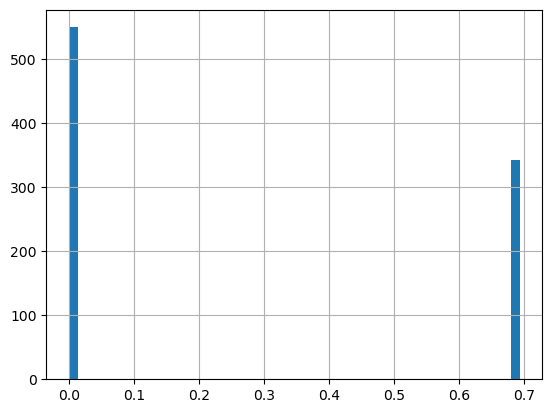

In [39]:
np.log1p(df["Survived"]).hist(bins=50)
plt.show(block=True)

# 11. Analysis of Correlation

In [40]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (12, 8)})
        sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")  # annot=True added here
        plt.show()
    return drop_list

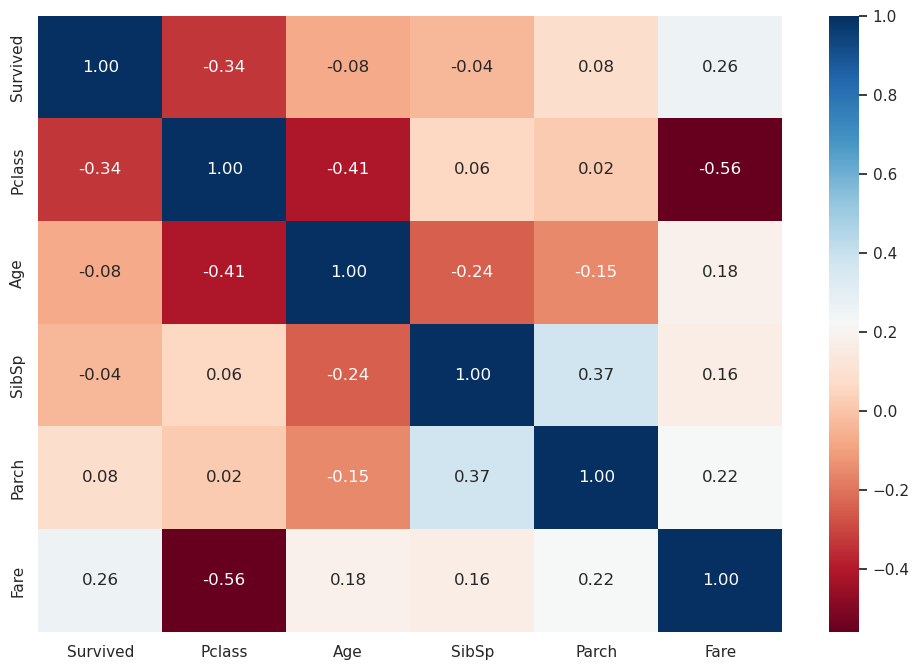

[]

In [41]:
high_correlated_cols(df, plot=True)

In [42]:
corr = df[num_cols].corr()

In [43]:
corr

,Age,Fare
Age,1.000,0.179
Fare,0.179,1.000


In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000,3,male,22.000,1,0,7.250,S
1,1.000,1,female,38.000,1,0,71.283,C
2,1.000,3,female,26.000,0,0,7.925,S
3,1.000,1,female,35.000,1,0,53.100,S
4,0.000,3,male,35.000,0,0,8.050,S


# 12. The Relationship Between Variables

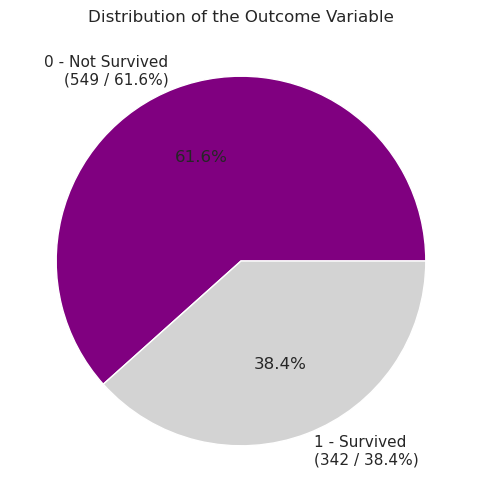

In [45]:
# Calculate the counts of each outcome
outcome_counts = df['Survived'].value_counts()

# Calculate the total number of passengers
total_passengers = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_passengers * 100

# Create labels with both quantity and percentage
labels = [f'0 - Not Survived\n({outcome_counts[0]} / {percentages[0]:.1f}%)',
          f'1 - Survived\n({outcome_counts[1]} / {percentages[1]:.1f}%)']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['purple', 'lightgray'])
plt.title('Distribution of the Outcome Variable')
plt.show()

# 13. Missing Value Analysis

In [46]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [47]:
# Fill missing values in 'Age' column with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [48]:
# Fill missing values in 'Embarked' column with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [49]:
# Fill missing values in 'Fare' column with the median fare
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [50]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

# 14. Outlier Analysis

In [51]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [52]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [53]:
def check_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    if outliers.any(axis=None):
        if plot:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
        return True
    else:
        return False

In [54]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Age False


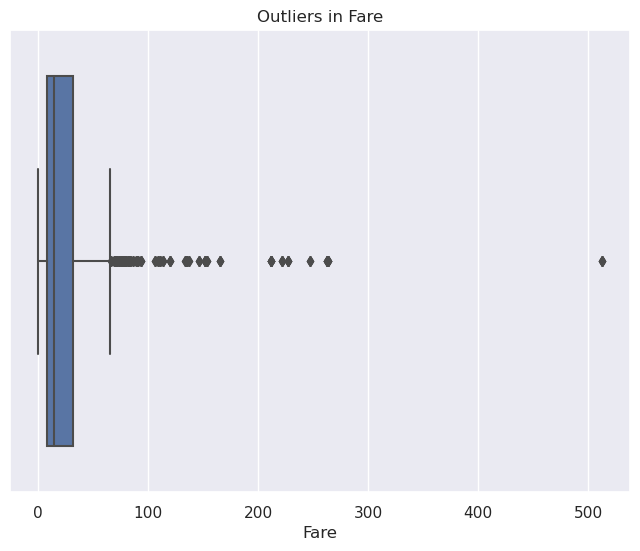

Fare True


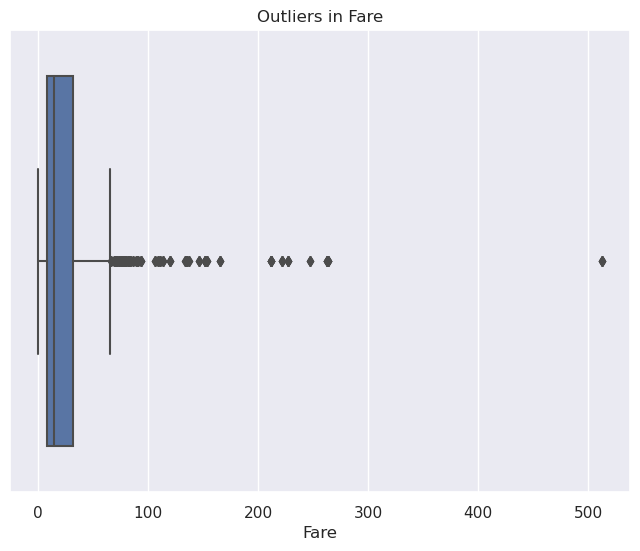

In [55]:
for col in ['Age', 'Fare']:
    print(col, check_outlier(df, col, plot=True))
    if check_outlier(df, col, plot=True):
        replace_with_thresholds(df, col)

In [56]:
for col in ['Age', 'Fare']:
    print(col, check_outlier(df, col))

Age False
Fare False


# 15. Feature Extraction

In [57]:
df["TotalFamily"] = df["SibSp"] + df["Parch"]

In [58]:
df['Alone'] = (df['SibSp']==0) & (df['Parch']==0)


In [59]:
bins= [0,2,17,65,100]
labels = ['Baby','Child','Adult','Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [60]:
bins= [-1,130,260,390,520]
labels = ['Low','Medium','High','Very High']
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=True)


In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TotalFamily,Alone,AgeGroup,FareGroup
0,0.000,3,male,22.000,1,0,7.250,S,1,False,Adult,Low
1,1.000,1,female,38.000,1,0,71.283,C,1,False,Adult,Low
2,1.000,3,female,26.000,0,0,7.925,S,0,True,Adult,Low
3,1.000,1,female,35.000,1,0,53.100,S,1,False,Adult,Low
4,0.000,3,male,35.000,0,0,8.050,S,0,True,Adult,Low


In [62]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 1309
Variables: 12
cat_cols: 10
num_cols: 2
cat_but_car: 0
num_but_cat: 8


In [63]:
cat_cols

['Sex',
 'Embarked',
 'Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'TotalFamily',
 'Alone',
 'AgeGroup',
 'FareGroup']

In [64]:
cat_cols.remove("Survived")

In [65]:
cat_cols = ['Pclass', 'SibSp', 'Parch', 'TotalFamily', 'Alone', 'AgeGroup', 'FareGroup', 'Embarked', ]

In [66]:
num_cols

['Age', 'Fare']

In [67]:
cat_but_car

[]

In [68]:
num_but_cat

['Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'TotalFamily',
 'Alone',
 'AgeGroup',
 'FareGroup']

# 14. Encoding

In [69]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [70]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [71]:
binary_cols

['Sex']

In [72]:
for col in binary_cols:
    df = label_encoder(df, col)

In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TotalFamily,Alone,AgeGroup,FareGroup
0,0.000,3,1,22.000,1,0,7.250,S,1,False,Adult,Low
1,1.000,1,0,38.000,1,0,71.283,C,1,False,Adult,Low
2,1.000,3,0,26.000,0,0,7.925,S,0,True,Adult,Low
3,1.000,1,0,35.000,1,0,53.100,S,1,False,Adult,Low
4,0.000,3,1,35.000,0,0,8.050,S,0,True,Adult,Low


In [74]:
# One-Hot Encoding

In [75]:
#cat_cols.remove("Sex")

In [76]:
cat_cols

['Pclass',
 'SibSp',
 'Parch',
 'TotalFamily',
 'Alone',
 'AgeGroup',
 'FareGroup',
 'Embarked']

In [77]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [78]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [79]:
df.head(10)

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,TotalFamily_1,TotalFamily_2,TotalFamily_3,TotalFamily_4,TotalFamily_5,TotalFamily_6,TotalFamily_7,TotalFamily_10,Alone_True,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elderly,FareGroup_Medium,FareGroup_High,FareGroup_Very High,Embarked_Q,Embarked_S
0,0.000,1,22.000,7.250,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.000,0,38.000,71.283,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.000,0,26.000,7.925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,1.000,0,35.000,53.100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.000,1,35.000,8.050,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
5,0.000,1,28.000,8.458,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6,0.000,1,54.000,51.862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
7,0.000,1,2.000,21.075,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
8,1.000,0,27.000,11.133,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,1.000,0,14.000,30.071,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# 15. Standardization

In [80]:
#num_cols

In [81]:
#num_cols = ['Age', 'Fare', "Pclass"]

In [82]:
#scaler = StandardScaler()

In [83]:
#df[num_cols] = scaler.fit_transform(df[num_cols])

In [84]:
#df.head(10)

# 16. Modelling

In [85]:
# Separating Train and Test data

train = df[:first_train]

test_1 = df[first_train:]

In [86]:
# Creating the Dependent Variable.

y = train['Survived']

# Creating Independent Variables.

X = train.drop('Survived', axis=1)

# Splitting the Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [87]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log

83.95

In [88]:
# CatBoost
cb_model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_test) 

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.25706398515642104
MSE: 0.14852676651050584
RMSE: 0.38539170529541217


In [90]:
train.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,TotalFamily_1,TotalFamily_2,TotalFamily_3,TotalFamily_4,TotalFamily_5,TotalFamily_6,TotalFamily_7,TotalFamily_10,Alone_True,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elderly,FareGroup_Medium,FareGroup_High,FareGroup_Very High,Embarked_Q,Embarked_S
0,0.000,1,22.000,7.250,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.000,0,38.000,71.283,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.000,0,26.000,7.925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,1.000,0,35.000,53.100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.000,1,35.000,8.050,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [91]:
test_1.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,TotalFamily_1,TotalFamily_2,TotalFamily_3,TotalFamily_4,TotalFamily_5,TotalFamily_6,TotalFamily_7,TotalFamily_10,Alone_True,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elderly,FareGroup_Medium,FareGroup_High,FareGroup_Very High,Embarked_Q,Embarked_S
891,NaN,1,34.500,7.829,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
892,NaN,0,47.000,7.000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
893,NaN,1,62.000,9.688,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
894,NaN,1,27.000,8.662,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
895,NaN,0,22.000,12.287,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# 16.1.RandomForestClassifier

In [92]:
# Random Forest Classifier Model Training

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Prediction using Random Forest Classifier Model

y_pred = rf_model.predict(X_test)

print("RandomForestClassifier:")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

RandomForestClassifier:
Accuracy: 0.7687
Recall: 0.7333
Precision: 0.6937
F1: 0.713
Auc: 0.7624


# 16.2.Logistic Regression

In [93]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_pred, y_test), 4)}")

Logistic Regression:
Accuracy: 0.7836
Recall: 0.7789
Precision: 0.6667
F1: 0.7184
AUC: 0.7825


# 16.3.K-Nearest Neighbors (KNN)

In [94]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")

K-Nearest Neighbors (KNN):
Accuracy: 0.7052
Recall: 0.6951
Precision: 0.5135
F1: 0.5907
AUC: 0.7024


# 16.4.Support Vector Classifier (SVC)

In [95]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print("Support Vector Classifier (SVC):")
print(f"Accuracy: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1: {round(f1_score(svc_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(svc_pred, y_test), 4)}")

Support Vector Classifier (SVC):
Accuracy: 0.653
Recall: 0.725
Precision: 0.2613
F1: 0.3841
AUC: 0.6827


# 16.5.Decision Tree Classifier

In [96]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(f"Accuracy: {round(accuracy_score(dt_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(dt_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(dt_pred, y_test), 4)}")
print(f"F1: {round(f1_score(dt_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(dt_pred, y_test), 4)}")

Decision Tree Classifier:
Accuracy: 0.7873
Recall: 0.75
Precision: 0.7297
F1: 0.7397
AUC: 0.7812


# 16.6.AdaBoost Classifier

In [97]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

print("AdaBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(ada_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(ada_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(ada_pred, y_test), 4)}")
print(f"F1: {round(f1_score(ada_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(ada_pred, y_test), 4)}")

AdaBoost Classifier:
Accuracy: 0.7836
Recall: 0.7477
Precision: 0.7207
F1: 0.7339
AUC: 0.7776


# 16.7.Gradient Boosting Classifier

In [98]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {round(accuracy_score(gb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(gb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(gb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(gb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(gb_pred, y_test), 4)}")

Gradient Boosting Classifier:
Accuracy: 0.8134
Recall: 0.8081
Precision: 0.7207
F1: 0.7619
AUC: 0.8123


# 16.8.XGBoost Classifier

In [99]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(xgb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(xgb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(xgb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(xgb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(xgb_pred, y_test), 4)}")

XGBoost Classifier:
Accuracy: 0.7985
Recall: 0.7822
Precision: 0.7117
F1: 0.7453
AUC: 0.7953


# 16.9.LightGBM Classifier

In [100]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

print("LightGBM Classifier:")
print(f"Accuracy: {round(accuracy_score(lgbm_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lgbm_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lgbm_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lgbm_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lgbm_pred, y_test), 4)}")

LightGBM Classifier:
Accuracy: 0.8022
Recall: 0.7843
Precision: 0.7207
F1: 0.7512
AUC: 0.7988


# 16.10.Comparison of Metrics for Different Models

In [101]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7706, 0.7879, 0.7619, 0.7446, 0.7186, 0.7532, 0.7706, 0.7706, 0.7619],
    "Recall": [0.7059, 0.7667, 0.6711, 0.6833, 0.6053, 0.6765, 0.7, 0.7059, 0.6857],
    "Precision": [0.5926, 0.5679, 0.6296, 0.5062, 0.5679, 0.5679, 0.6049, 0.5926, 0.5926],
    "F1": [0.6443, 0.6525, 0.6497, 0.5816, 0.586, 0.6174, 0.649, 0.6443, 0.6358],
    "AUC": [0.7517, 0.781, 0.7388, 0.7247, 0.6897, 0.7309, 0.7506, 0.7517, 0.7404]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models"
)

# Displaying the graph
fig.show(block=True)

# 16.11.Plot Importance of Variables According to Base Model

In [102]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

In [103]:
model_name = [rf_model, dt_model, xgb_model, lgbm_model]

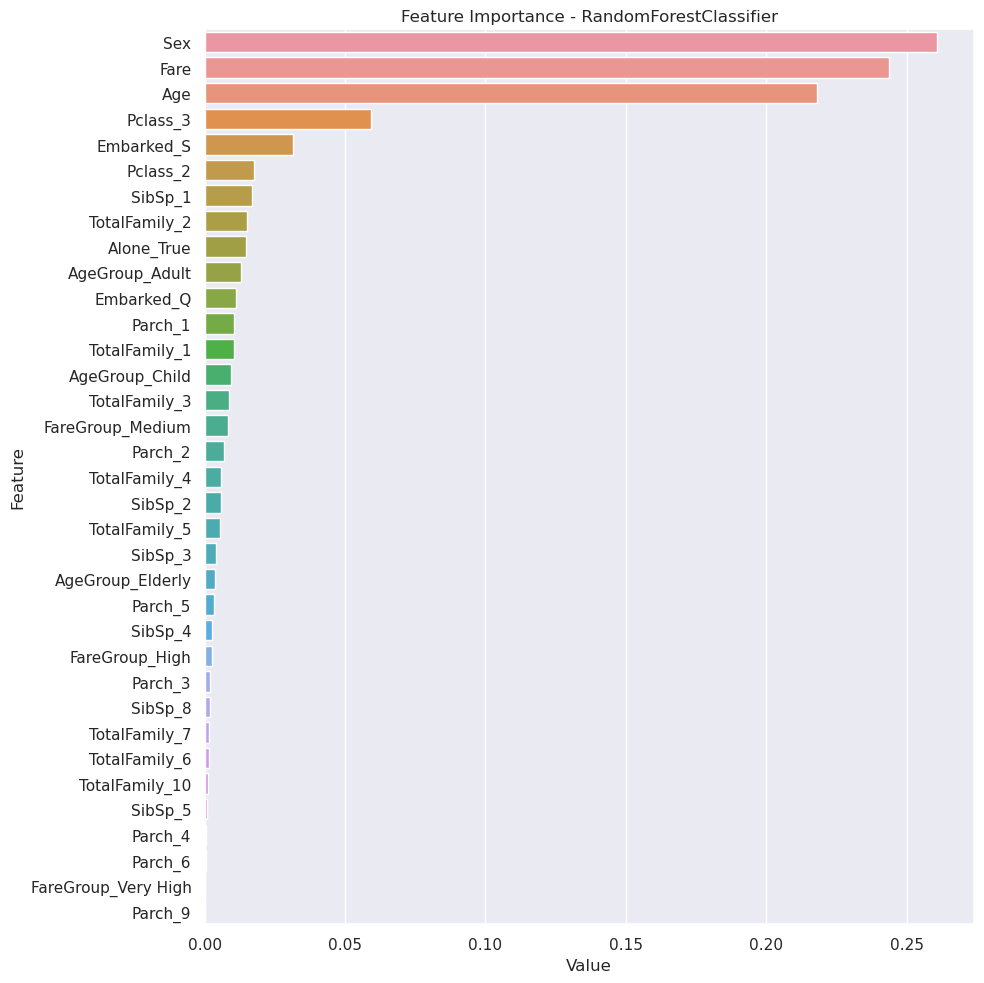

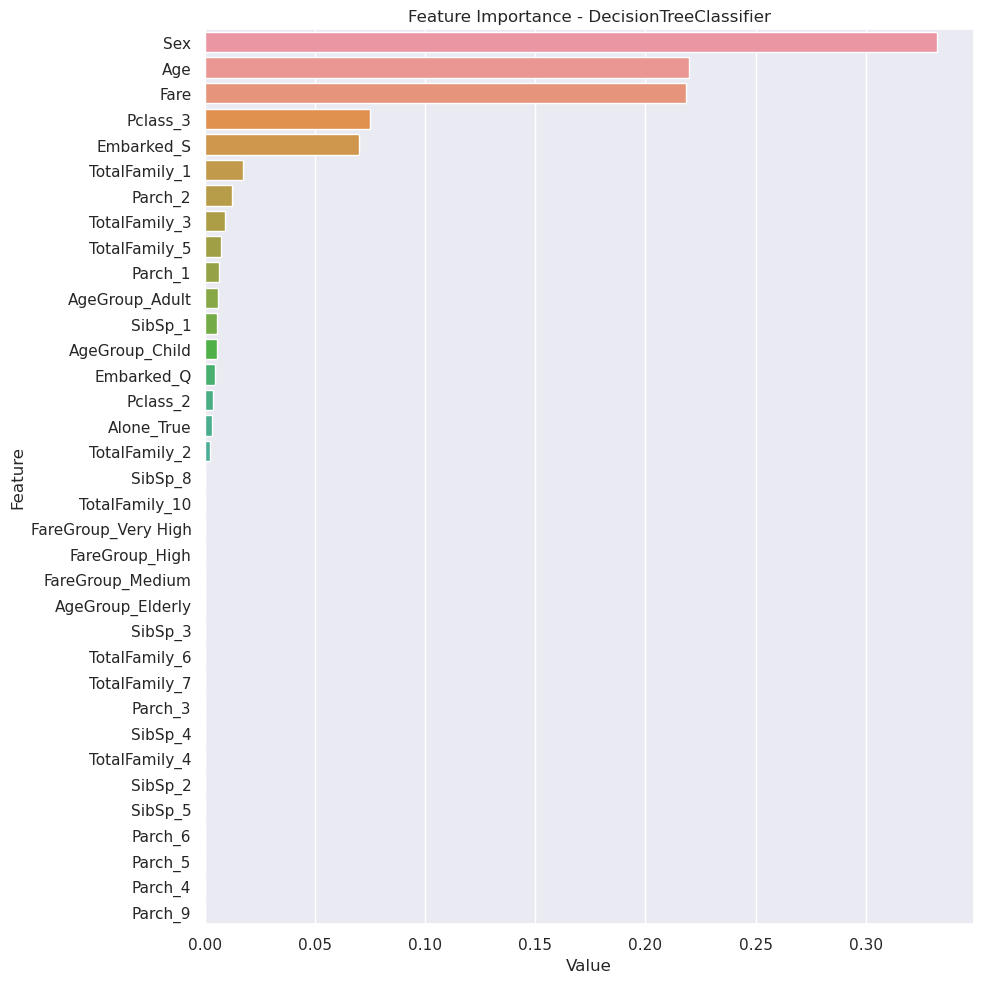

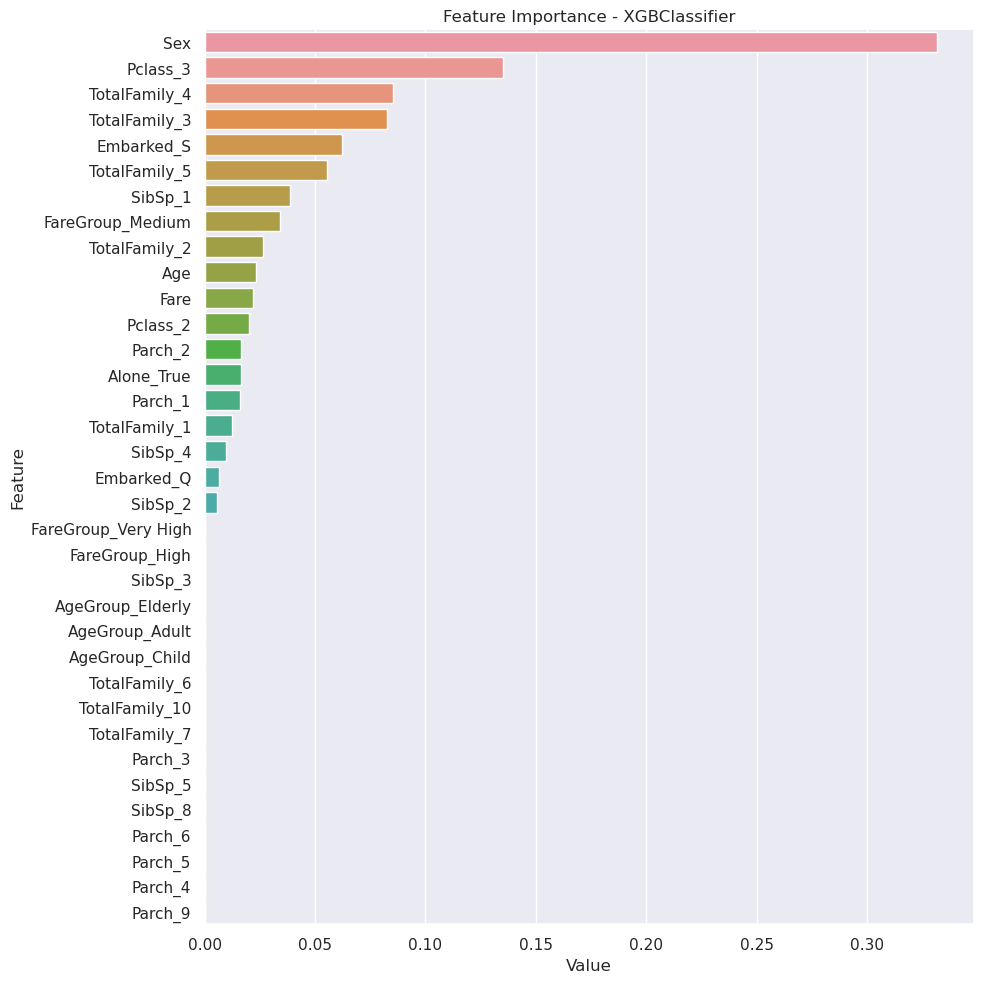

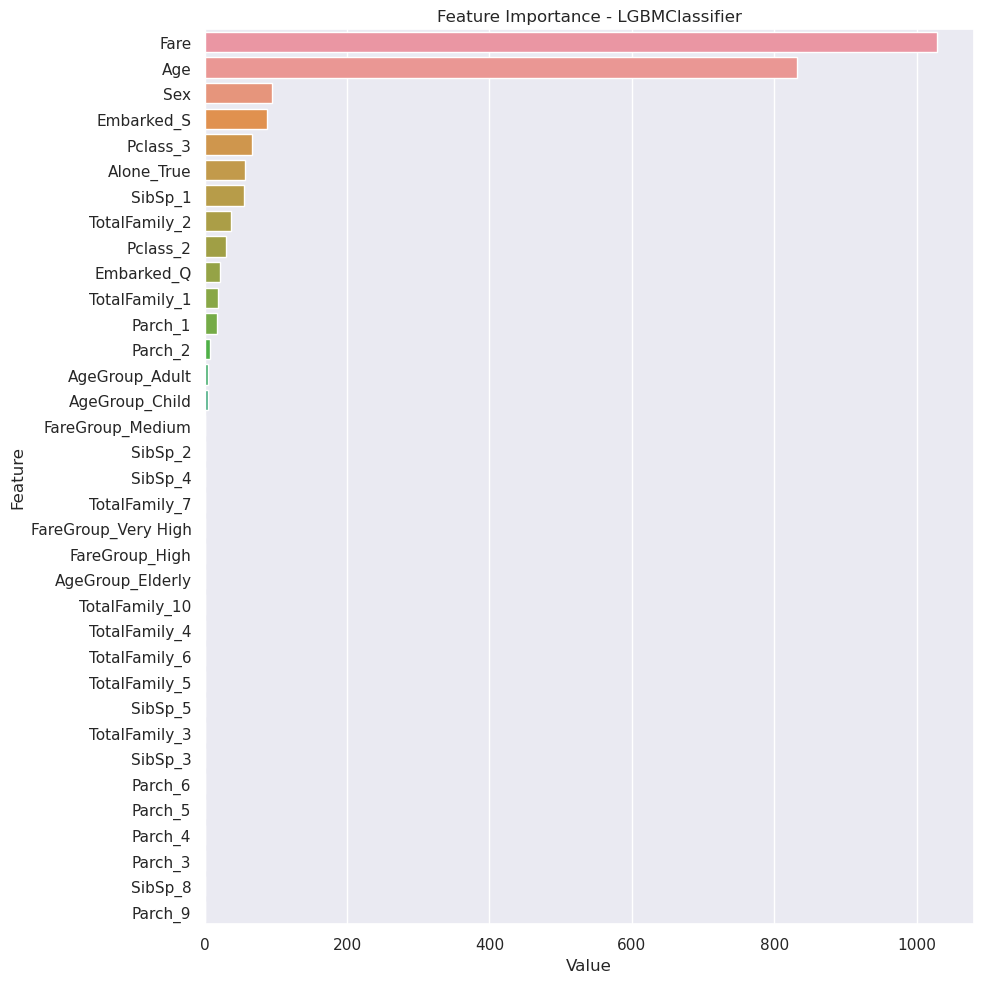

In [104]:
for i in model_name:
    plot_importance(i, X)

# 17. Prediction

In [105]:
test_1=test_1.drop("Survived",axis=1)

In [106]:
test_1

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,TotalFamily_1,TotalFamily_2,TotalFamily_3,TotalFamily_4,TotalFamily_5,TotalFamily_6,TotalFamily_7,TotalFamily_10,Alone_True,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elderly,FareGroup_Medium,FareGroup_High,FareGroup_Very High,Embarked_Q,Embarked_S
891,1,34.500,7.829,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
892,0,47.000,7.000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
893,1,62.000,9.688,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
894,1,27.000,8.662,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
895,0,22.000,12.287,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,28.000,8.050,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1305,0,39.000,108.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1306,1,38.500,7.250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1307,1,28.000,8.050,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [107]:
Sub = model.predict(test_1)

In [108]:
Sub

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [109]:
submission = pd.DataFrame({
        "PassengerId": sub_id,
        "Survived": Sub
    })

submission.head()

,PassengerId,Survived
0,892,0.000
1,893,0.000
2,894,0.000
3,895,0.000
4,896,1.000


In [110]:
submission.to_csv('submission.csv',index=False)